## Part A
### Q1) Hash Tables

#### Draw the 11-entry hash table that results from using the hash function:
    h (i) = (3i+5) mod 11

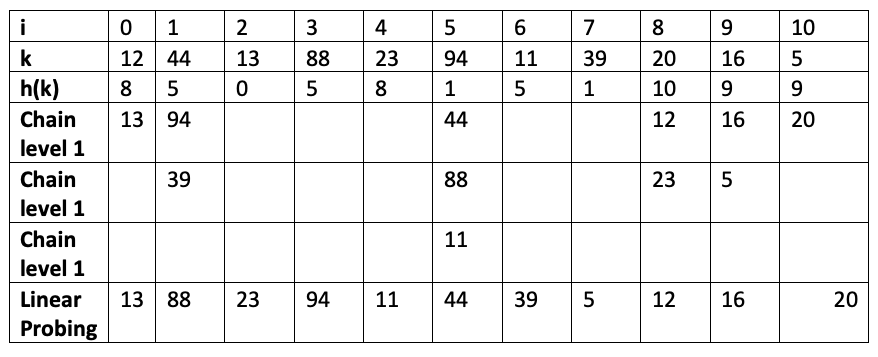

#### Explain and discuss some differences between circular chaining and linear probing:


## TODO.. 

- Chaining will handle deletions better than linear probing - no need to rehash
- Probing handle insertions better - no need to allocate more memory for another link in the chain as the array is defined up front. 


### Q2) Undirected Graphs
 
a)  will now attach a screenshot of G, the graph generated from Table 1. 

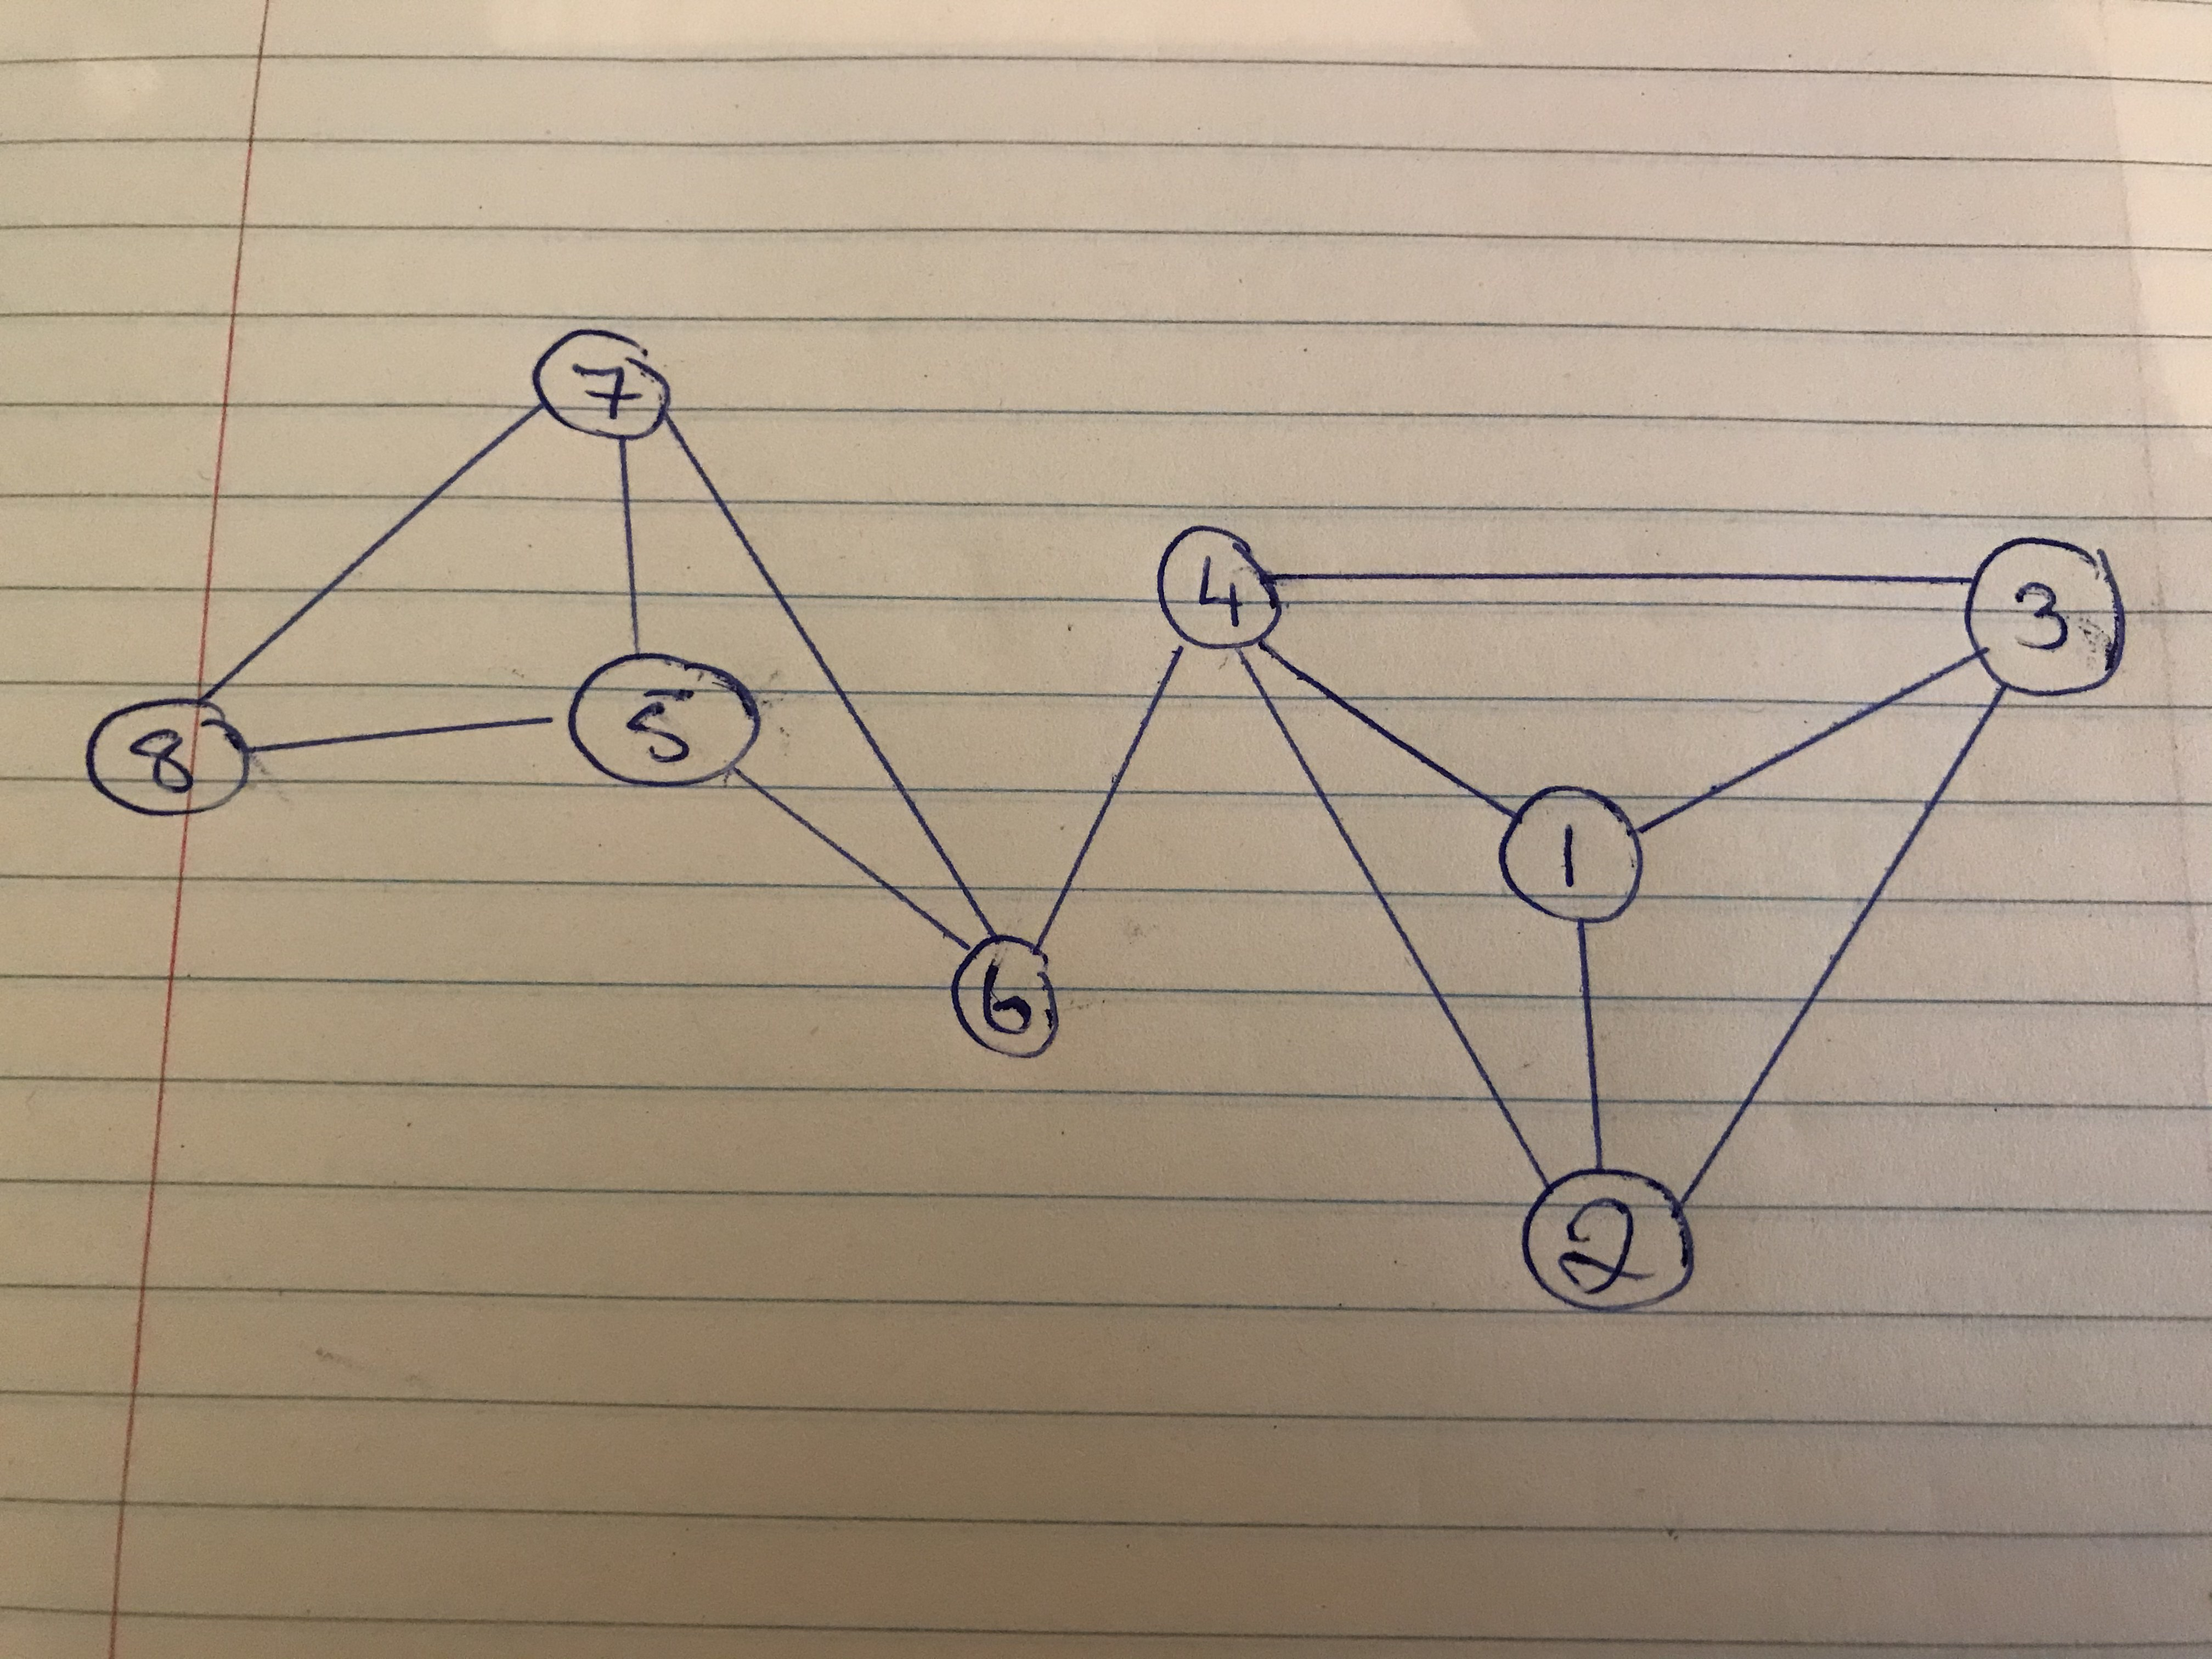

We will now perform a depth first search (DFS) followed by a breadth first search (BFS) on G. Rather than just list the sequences obtained, we will briefly decribe the steps being taken in order to obtain the sequences. As per the assignment, we will then define DFS and BFS and discuss the sequences obtained. 

b) Sequence of vertices of G visited using a DFS traversal starting at vertex 1:

### If time, step through in more detail...
https://www.tutorialspoint.com/data_structures_algorithms/depth_first_traversal.htm

For ease of understanding, I will present each step of the route as a pair, with the first element in the pair representing the vertex we are moving from, and the second element representing the vertex being travelled to. This is similar to the way that ```networkx``` outputs the results as seen in Lab 7.

**The steps of the sequence are:**
(1,2),(2,3),(3,4),(4,6),(6,5),(5,7),(7,8)

**Overall sequence obtained:** 1, 2, 3, 4, 6, 5, 7, 8

c) Sequence of vertices of G visited using a BFS traversal starting at vertex 1:

- Start at 1
- Nodes adjacent to 1 are 2,3,4 so we visit all 3.
- 6 is adjacent to these nodes so we visit 6.
- 5, 7 are adjacent to these nodes so we visit them next. 
- 8 is the only unvisited node adjacent to the visited nodes. 

**The steps of the sequence are:**
(1,2)(1,3)(1,4)(4,6)(6,5)(6,7)(7,8)


**Sequence obtained:** 1, 2, 3, 4, 6, 5, 7, 8

## TODO

#### Discuss the terms DFS and BFS in your own words briefly and discuss your observations about the obtained sequences. 



## Part B:
### Q1 Sorting Algorithms:


In [1]:
from time import perf_counter

In [2]:
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

In [41]:
def partition(arr, low, high):
    """Return a pivot element for Quicksort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot

def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)
    return arr

In [28]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

Test the sorting algorithms.

In [29]:
arr = [3,2,1]

In [32]:
test_array1 = [9,8,7,6,5,4,3,2,1]

In [33]:
print(bubble_sort(test_array1))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [42]:
test_array2 = [9,8,7,6,5,4,3,2,1]

In [43]:
print(quicksort(test_array2))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [36]:
test_array3 = [9,8,7,6,5,4,3,2,1]

In [37]:
print(mergesort(test_array3))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [11]:
def create_array(num):
    '''create an array sorted in descending order'''
    values = []
    for i in range(num, 0, -1):
        values.append(i)
    return values

In [12]:
print(create_array(5))

[5, 4, 3, 2, 1]


In [13]:
def time_sorting_algorithm(algorithm):
    '''measure the time taken to sort arrays of different size using different sorting algorithms.
    
    results are stored in a dictionary.'''
    results = {}
    for i in range(1, 1000, 10):
        values = create_array(i)
        t1_start = perf_counter()
        algorithm(values)
        t1_stop = perf_counter()
        results[i] = t1_stop-t1_start
    return results

In [14]:
bubble_sort_results = time_sorting_algorithm(bubble_sort)

In [15]:
quick_sort_results = time_sorting_algorithm(quicksort)

In [16]:
merge_sort_results = time_sorting_algorithm(mergesort)

## 2) Dijkstra's Algorithm